<center><h1> The dynamic neutrality of the ocean’s biological carbon pump </h1></center>
    
<center><h3> Figures </h3></center>

**L. Delaigue<sup>1,3</sup>, R. Sauzède<sup>3</sup>, G-J. Reichart<sup>1,2</sup>, H. Claustre<sup>3</sup>, O. Sulpis<sup>4</sup> and Matthew P. Humphreys<sup>1</sup>**

<sup>1</sup> Department of Ocean Systems (OCS), NIOZ Royal Netherlands Institute for Sea Research, PO Box 59, 1790 AB Den Burg (Texel), the Netherlands  

<sup>2</sup> Department of Earth Sciences, Utrecht University, Utrecht, the Netherlands  

<sup>3</sup> Laboratoire d’Océanographie de Villefranche, Institut de la Mer de Villefranche, 06230 Villefranche-Sur-Mer, France

<sup>4</sup> CEREGE, Aix Marseille Univ, CNRS, IRD, INRAE, Collège de France, Aix-en-Provence, France

## Abstract

The ocean’s dissolved inorganic carbon (DIC) reservoir is a key component of the global carbon cycle and is influenced by atmospheric CO₂ absorption. Over recent decades, DIC has increased due to rising anthropogenic CO₂ (DIC$_{anth}$), while the biological carbon pump’s (BCP) contribution to natural DIC (DIC$_{soft}$) remains less understood. In this study, we reconstructed the global DIC distribution and decomposed it into its components: DIC$_{soft}$, DIC$_{carb}$ (carbonate counter pump contribution), and DIC$_{anth}$. 

Our results show a global DIC increase, with surface waters rising ~1 μmol kg$^{-1}$ yr$^{-1}$, primarily driven by DIC$_{anth}$, which accounted for over 90% of the surface increase. The influence of DIC$_{anth}$ diminished with depth, reflecting limited penetration into the ocean interior. In contrast, DIC$_{soft}$ exhibited minimal contribution to the total DIC change on a global scale, remaining within 10% of the total DIC increase. However, significant regional variations in DIC$_{soft}$ were observed. 

These patterns suggest that, while the BCP’s global impact on DIC remained minor due to the balance between organic carbon export and remineralization, climate change may drive a global redistribution of the BCP and lead to significant regional impacts.

**____________________________________________________________________________________________________________________________**


## Figure 1 
### Global mean rates of change in each DIC component as a function of pressure (dbar) within the first 2000m of the water column

This script analyzes the ocean’s **dissolved inorganic carbon (DIC) dynamics** using observational data and a **Monte Carlo simulation** to estimate uncertainties in its decomposition. The workflow includes:

**1. Data Loading & Preprocessing**
- Loads global ocean datasets, including **DIC**, **total alkalinity (TA)**, and **apparent oxygen utilization (AOU)**.
- Computes **absolute salinity**, **potential temperature**, and **density** using GSW equations.

**2. Monte Carlo Simulations**
- Perturbs **DIC, TA, and AOU** within their respective uncertainty ranges.
- Quantifies uncertainty in their long-term trends.

**3. Carbon Pump Contributions**
- Decomposes DIC trends into:
  - **DIC_soft** (biological soft tissue pump contribution)
  - **DIC_carb** (carbonate counter pump contribution)
  - **DIC_anth** (anthropogenic CO₂-driven increase)

**4. Global Mean Computation**
- Computes global trends by applying **weighted averaging** to account for the Earth's geometry.
- Uses **Welford’s online algorithm** to efficiently compute the **mean and variance** of DIC trends without storing all iterations in memory.
- Ensures accurate **error propagation** across Monte Carlo simulations.

**5. Results Export**
- Saves the final dataset, including **uncertainty estimates**, for further analysis.

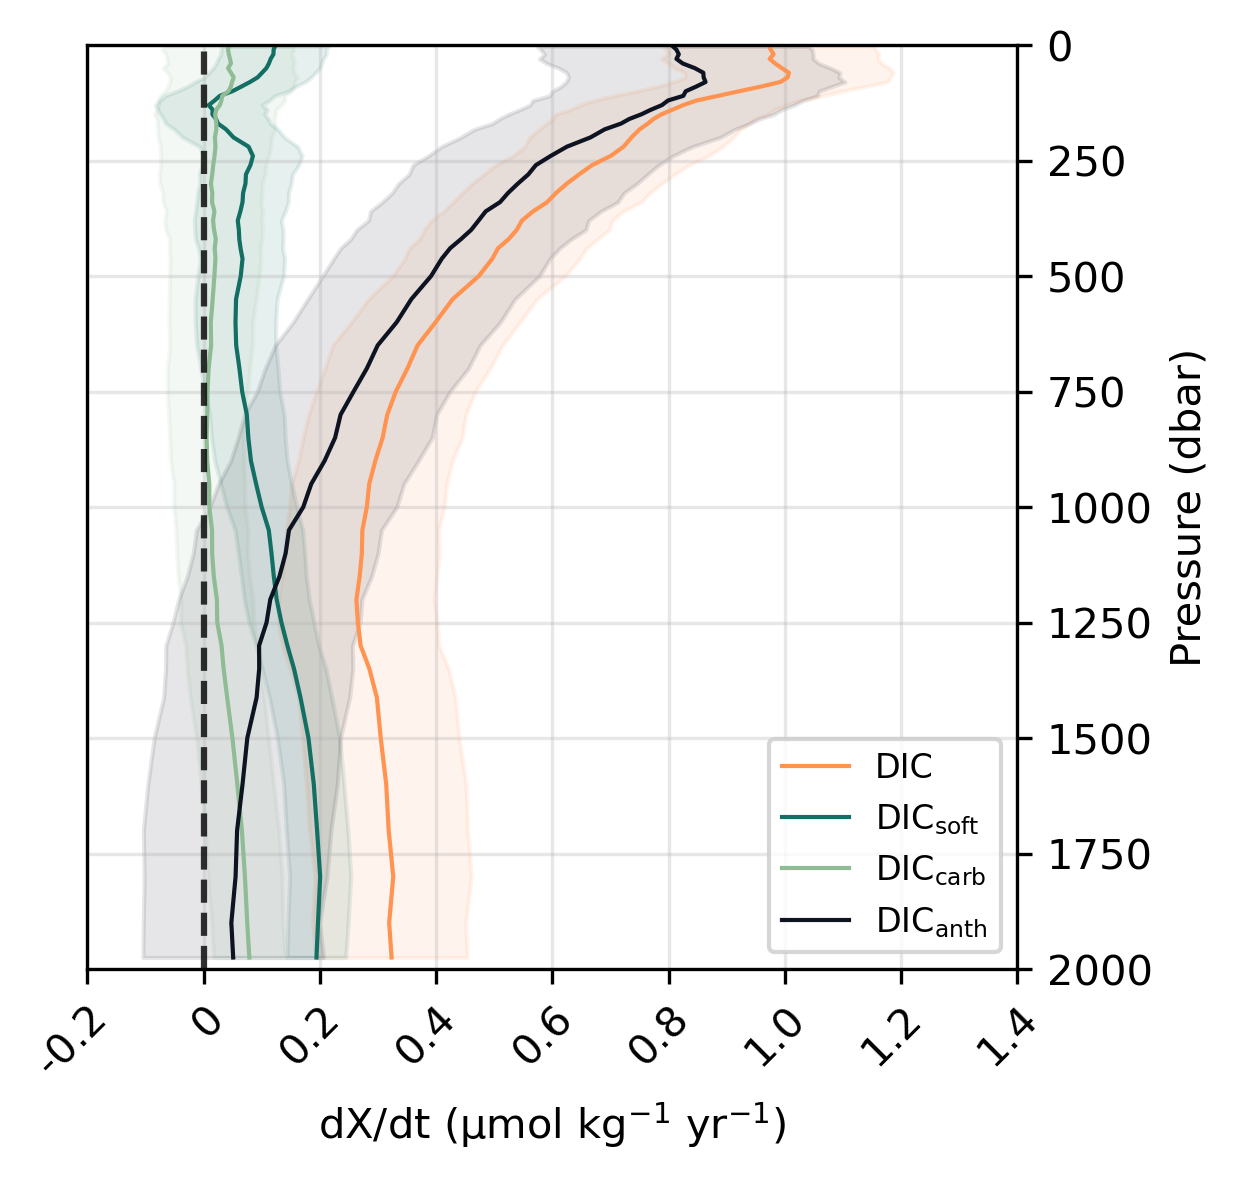

In [16]:
import matplotlib.pyplot as plt
import xarray as xr

# Load dataset
global_mean_ds = xr.load_dataset("data/01_DIC_globally_averaged_change_monte_carlo_online.nc")

# Create a single figure with just ax2
fig, ax2 = plt.subplots(figsize=(4, 4), dpi=300)  # Adjust figure size as needed

# Custom labels and colors
custom_labels = {
    'DIC_rate': 'DIC',
    'soft_pump_aou_change': 'DIC$_{\\mathrm{soft}}$',
    'carb_pump_change': 'DIC$_{\\mathrm{carb}}$',
    'co2_anth_aou_change': 'DIC$_{\\mathrm{anth}}$'
}
custom_colors = {
    'DIC_rate': '#FF934F',
    'soft_pump_aou_change': '#136F63',
    'carb_pump_change': '#8FBC94',
    'co2_anth_aou_change': '#0D1321'
}

legend_handles = []  # To store handles for the legend

# Loop through the data variables to plot each one with custom colors and error bands
for var in ['DIC_rate', 'soft_pump_aou_change', 'carb_pump_change', 'co2_anth_aou_change']:
    data_array = global_mean_ds[var]
    sigma_var = global_mean_ds[f'{var}_uncertainty']  # Constructing the uncertainty variable name

    line, = ax2.plot(data_array, global_mean_ds['pres'], label=custom_labels[var], color=custom_colors[var], linewidth=1)
    ax2.fill_betweenx(global_mean_ds['pres'], data_array - sigma_var, data_array + sigma_var, color=custom_colors[var], alpha=0.1)

    legend_handles.append(line)  # Only add line (not fill_betweenx) to legend

# Set y-axis limits
ax2.set_ylim(2000, 0)  # Keeping pressure in reverse order (oceanographic convention)

# Set x-axis limits and labels
ax2.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
ax2.set_xticklabels(['-0.2', '0', '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4'])

# Rotate x-axis tick labels by 45 degrees
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Set up legend
ax2.legend(legend_handles, [custom_labels[var] for var in custom_labels], loc='lower right', fontsize=8)

# Improve figure
ax2.set_xlabel("dX/dt (μmol kg$^\mathrm{-1}$ yr$^\mathrm{-1})$")
ax2.set_ylabel('Pressure (dbar)')
ax2.grid(alpha=0.3)

# Add subplot label "b)" to the top left
# ax2.text(0.05, 1.07, 'b)', transform=ax2.transAxes, va='top', ha='right')

# Add right y-axis ticks
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

# Add vertical line at x = 0
ax2.axvline(0, color='black', alpha=0.8, linestyle='--')

# Save and show the figure
plt.savefig('figs/Figure1.png', bbox_inches='tight', dpi=300)
plt.show()


**____________________________________________________________________________________________________________________________**


## Figure 2a
### Spatial redistribution of the BCP through depth-integrated (i.e., 0 to 2000m) rates of change in DICsoft across the study period

#### 02_DIC_integrated_change_map_monte_carlo_online_pres_diff

This script performs a **Monte Carlo-based uncertainty analysis** on the **depth-integrated natural dissolved inorganic carbon (DIC) change** in the global ocean. The workflow includes:

**1. Data Loading & Preprocessing**
- Loads global ocean datasets, including **DIC**, **total alkalinity (TA)**, and **apparent oxygen utilization (AOU)**.
- Computes **absolute salinity**, **potential temperature**, and **density** using GSWquations.

**2. Monte Carlo Simulations**
- Runs **1,000 iterations**, perturbing DIC, TA, and AOU using their respective uncertainties.
- Computes **linear trends** (per year) in each variable.

**3. Carbon Pump Contributions**
- Decomposes DIC trends into:
  - **DIC_nat** (soft tissue pump contribution)
  - **DIC_carb** (carbonate counter pump contribution)
  - **DIC_anth** (anthropogenic CO₂-driven increase)

**4. Depth Integration of DIC_nat**
- Converts trends to **mol/m³** using seawater density.
- Integrates DIC_nat across pressure levels to obtain **depth-integrated carbon change (mol/m²)**.

 **5. Uncertainty Quantification & Error Propagation**
- Uses **Welford’s method** for an online computation of mean and variance.
- Propagates uncertainties across depth layers.

 **6. Results Export**
- Saves the final dataset with **depth-integrated natural DIC change and uncertainty estimates** for further analysis.